## Trying out a new model 

In [16]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from matplotlib import pyplot as plt

In [17]:
# create some data using Linear reg formula weight * x + b
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

X = torch.arange(start , end, step).unsqueeze(dim = 1)
y = weight * X + bias
print(X [:10])
print(y [:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [18]:
# spliting data
train_split = int (0.6 *len(X))
X_train, y_train  = X[:train_split],y[:train_split]
X_test, y_test  = X[train_split:],y[train_split:]
print(len(X_train ))
print(len(y_train ))
print(len(X_test ))
print(len(y_test ))

30
30
20
20


In [19]:
# plot the data
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

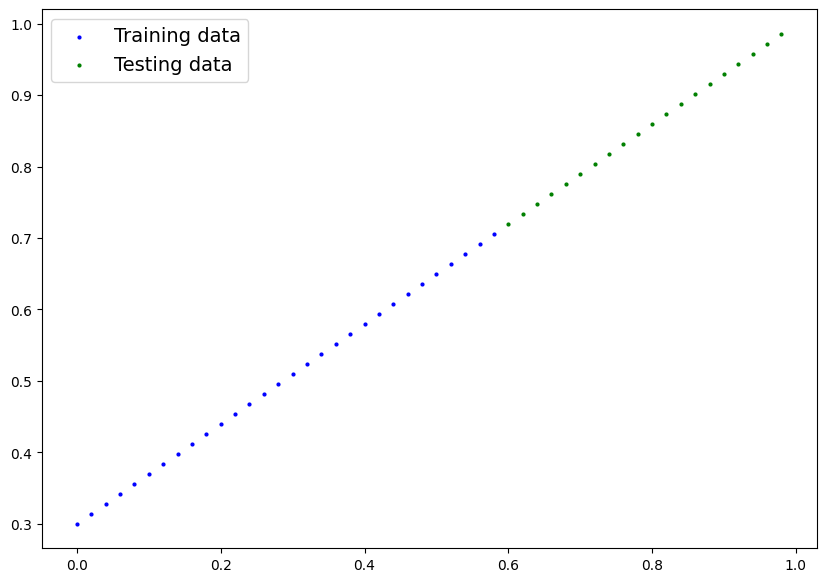

In [20]:
plot_predictions(X_train,y_train , X_test ,y_test)

In [21]:
# builing a simple linear reg



class LinearReg (nn.Module):
    def __init__ (self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype = torch.float,
                                                requires_grad=True))
        
        
        self.bias = nn.Parameter(1,
                                 dtype = torch.float,
                                 requires_grad=True)
        
        
    def forward(self, x :torch.Tensor)-> torch.Tensor :
        return self.weights *x +self.bias 
        

In [22]:
# create a linear model by subclass nn.Module
class LinearReg_V2 (nn.Module):
    def __init__ (self):
        super().__init__()
        # using nn.Linear for creating model parameter
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1) # due to this line the forward pass of linear function is now buit
        # self.weight and bias line is now working behind the scene by pytorch
        
    def forward(self ,x):
        return self.linear_layer(x)

In [23]:

model_1 = LinearReg_V2()
model_1 , model_1.state_dict()

(LinearReg_V2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

as u can see i can see `linear_layer.weight` and `linear_layer.bias` which was created 
by pytorch behind the scenes


## Before vs after
![alt text](ss4.png)

In [24]:
# check model device
next(model_1.parameters()).device

device(type='cpu')

In [25]:
# training the model
# i need
# loss fn
# optim
# train loop
# test loop



In [26]:
# setup loss fn
loss_fn = nn.L1Loss() # MAE
optimizer = torch.optim.SGD(params = model_1.parameters(),lr= 0.01)

In [27]:
torch.manual_seed(42)
epochs = 200
train_loss_count = []
test_loss_count = []
epoch_count = []

for epoch in range (epochs) :
    model_1.train()
    # forward pass
    y_pred = model_1(X_train)
    #loss
    loss = loss_fn(y_pred,y_train)
    # zero grad
    optimizer.zero_grad()
    # back propogation
    loss.backward()
    # optimizer step
    optimizer.step()
    # testing
    model_1.eval()
    
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred,y_test)
        
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_count.append(loss.detach().numpy())
        test_loss_count.append(test_loss.detach().numpy())
        print(f"epoch {epoch}")
        print(f"Loss {loss}")
        print(f"Test Loss {test_loss}")

epoch 0
Loss 0.5487240552902222
Test Loss 0.5687023401260376
epoch 10
Loss 0.4403141736984253
Test Loss 0.44579237699508667
epoch 20
Loss 0.33190423250198364
Test Loss 0.3228824734687805
epoch 30
Loss 0.22349433600902557
Test Loss 0.19997254014015198
epoch 40
Loss 0.11508440971374512
Test Loss 0.07706259936094284
epoch 50
Loss 0.013859967701137066
Test Loss 0.03365200757980347
epoch 60
Loss 0.010203836485743523
Test Loss 0.03259658068418503
epoch 70
Loss 0.00814316887408495
Test Loss 0.02569473348557949
epoch 80
Loss 0.00607330584898591
Test Loss 0.018792863935232162
epoch 90
Loss 0.004003416281193495
Test Loss 0.012715709395706654
epoch 100
Loss 0.001991490600630641
Test Loss 0.004206591751426458
epoch 110
Loss 0.00524636497721076
Test Loss 0.0014483273262158036
epoch 120
Loss 0.00524636497721076
Test Loss 0.0014483273262158036
epoch 130
Loss 0.00524636497721076
Test Loss 0.0014483273262158036
epoch 140
Loss 0.00524636497721076
Test Loss 0.0014483273262158036
epoch 150
Loss 0.00524636

In [28]:
model_1.state_dict()  #to evaluate 

OrderedDict([('linear_layer.weight', tensor([[0.6888]])),
             ('linear_layer.bias', tensor([0.2980]))])

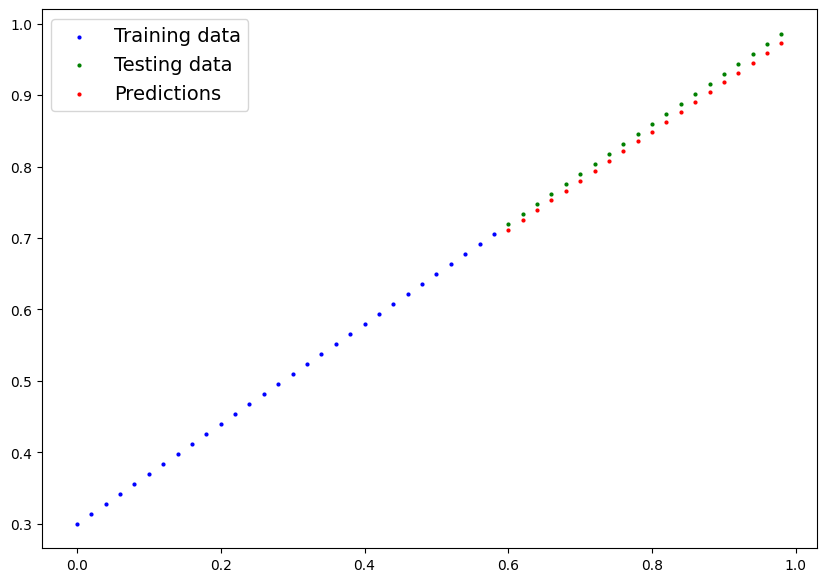

In [29]:
with torch.inference_mode():
    y_pred_new = model_1(X_test)

plot_predictions(predictions= y_pred_new)

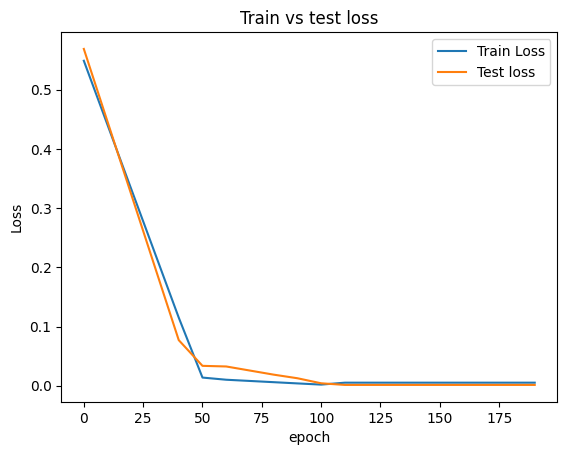

In [30]:
plt.plot(epoch_count,train_loss_count,label = "Train Loss")
plt.plot(epoch_count,test_loss_count,label = "Test loss")
plt.title ("Train vs test loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend()
